# Welcome to a Jupyter notebook! (in Google Colaboratory (Colab))

There are two types of cells: (1) text cells and (2) code cells. You're reading a text cell right now. Code cells have little [ ] brackets on the left, like the one below.

Select the code cell below and run the code in it by either clicking the little circular "play" button on the left of the cell, or by pressing Shift+Enter.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

The cell above will load a few useful Python packages for us and _alias_ them using shorter nicknames.

For example, to run the function `mean` from the Numpy package to take the average of the variable `x`, we would normally have to write `numpy.mean(x)`. With the alias above, we could just do `np.mean(x)`. Check this by running the cell below.

In [ ]:
x = [1, 2, 6]  # store the numbers 1, 2, and 6 in the variable `x`
np.mean(x)     # calculate the mean of the numbers in `x`

3.0

# CU Boulder FCQ data

Last week, you discussed biases in student evaluations of teaching (SETs). This week, we'll look at some actual data, publicly available from the University of Colorado Boulder's (CU Boulder) **Faculty Course Questionnaire (FCQ)** database ([found here](https://www.colorado.edu/fcq/boulder-fcq-results)).

Load the data from 2010-2019 and save it into the Pandas DataFrame `df` by running the cell below.

Pandas is a common data science package in Python. You'll notice we use the `read_excel` function from Pandas similarly to how we used the `mean` function from Numpy.

In [ ]:
# load the data
df = pd.read_excel("https://github.com/tonyewong/testDriving/raw/master/CUFCQ/inst_summary_download_1019_FCQResults.xlsx", index_col=None)

We can do a bit of preliminary cleaning of the data here. If you want to know more about the long and ~painful~ rewarding data cleaning process, ask Kate. She's having the time of her life. Right?

In [ ]:
# get rid of bad values for the Enroll variable
df = df.drop(df[df.Enroll=='(blank)'].index)
df.reset_index(inplace=True, drop=True)

# Change number of students feature to be numbers
df["Enroll"] = df["Enroll"].astype("int")

# Get only lecture sections (not labs, not recitations)
df = df.loc[df["Crse Type"]=="LEC"]

Python objects, like DataFrames, have **member functions** that we can run on them. A common thing we like to do is see the first few rows of a data set. We do this using the `head()` function by running the cell below. If you want to see more of the DataFrame, just remove the `.head()` part.

In [ ]:
df.head()

,Term,Year,Campus,College,Dept,Sbjct,Crse,Sect,Crse Title,Instructor Name,Instr Grp,Crse Type,Crse Lvl,Onlin,Enroll,# Resp,Resp Rate,HrsPerWk,Interest,Challenge,Learned,Course,Effect,Avail,Respect,Instr,SD Crse,SD Instr
0,Fall,2010,BD,BUSN,BU,ACCT,3220,002,CORP FINANCIAL RPRTNG 1,"Jagolinzer, Alan David",TTT,LEC,Upper,NaN,40,38.0,0.950000,2.888672,4.289062,5.183594,5.473633,5.578125,5.683594,5.789062,6.000000,5.841797,0.598633,0.369507
1,Fall,2010,BD,BUSN,BU,ACCT,3220,003,CORP FINANCIAL RPRTNG 1,"Jagolinzer, Alan David",TTT,LEC,Upper,NaN,45,42.0,0.933333,2.896973,3.737793,5.261719,5.213867,5.194336,5.666016,5.571289,5.975586,5.785156,0.872314,0.470337
2,Fall,2010,BD,BUSN,BU,ACCT,3220,004,CORP FINANCIAL RPRTNG 1,"Jagolinzer, Alan David",TTT,LEC,Upper,NaN,39,32.0,0.820513,2.413574,3.875000,5.343750,5.531250,5.531250,5.750000,5.687500,5.968750,5.968750,0.879272,0.176758
3,Fall,2010,BD,BUSN,BU,ACCT,3220,005,CORP FINANCIAL RPRTNG 1,"Mabon, Janet Lee",OTH,LEC,Upper,NaN,34,23.0,0.676471,2.869141,3.869141,5.347656,4.434570,3.782227,3.825684,5.454102,6.000000,4.303711,1.085205,1.427979
4,Fall,2010,BD,BUSN,BU,ACCT,3220,006,CORP FINANCIAL RPRTNG 1,"Hall, Renee Arlene",TTT,LEC,Upper,NaN,31,29.0,0.935484,3.035645,3.620605,5.241211,4.171875,3.206543,3.068848,4.550781,5.861328,3.137695,1.114014,1.156250


There are lots of variables (features) here! Crack open the description of data in Tony's GitHub repository [here](https://github.com/tonyewong/testDriving/blob/master/CUFCQ/inst_summary_download_1019_FCQDescription.csv) for more information about the data.

Many features, like the course `Sbjct` (subject) are categorical. Here's how we can check to see what the different values for the `College` are:

In [ ]:
df.College.unique()

array(['BUSN', 'CRSS', 'ARSC', 'ARPL', 'ENGR', 'EDUC', 'MUSC', 'CMCI',
       'LAWS', 'CEPS', 'LIBR'], dtype=object)

If we wanted to restrict our analysis to specific colleges - say, the College of Engineering (ENGR) or the College of Arts and Sciences (ARSC) - we could use the `loc[]` function for DataFrames.

Do this by running the next code cell. Do

In [ ]:
dfE = df.loc[df.College=="ENGR"].reset_index()
dfA = df.loc[df.College=="ARSC"].reset_index()

Could you copy-paste and modify one of the lines from above to create a new DataFrame, `dfM`, for the College of Media, Communication and Information (CMCI)?

Frequently, we want to chain together multiple conditions like the College restriction above. We can do this using the "&" operator in our `df.loc[]` command. Run the cell below to further restriction `dfE` and `dfA` to consider only lower-division undergraduate courses in the Colleges of Engineering and Arts and Sciences, respectively.

_(Note the need for parentheses around each condition if you use multiple conditions.)_

In [ ]:
dfE = df.loc[(df.College=="ENGR") & (df["Crse Lvl"]=="Lower")].reset_index()
dfA = df.loc[(df.College=="ARSC") & (df["Crse Lvl"]=="Lower")].reset_index()

## Let's do some science!

### Means

Here we can calculate and compare the mean numbers of students in each class (`Enroll`) for the College of Engineering and the College of Arts and Sciences.

In [ ]:
# Mean for Engineering
print(np.mean(dfE["Enroll"]))

# Mean for Arts and Sciences
print(np.mean(dfA["Enroll"]))

75.55555555555556
49.23373218286695


### Histograms

Can also see the **distribution** of class sizes by using a **histogram**. The heights of the boxes along the x-axis correspond to how many classes there are with those class sizes.

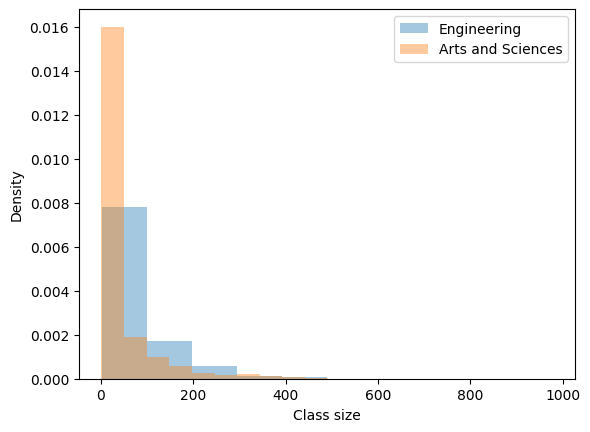

In [ ]:
plt.hist(dfE["Enroll"], density=True, alpha=0.4, label="Engineering")
plt.hist(dfA["Enroll"], density=True, alpha=0.4, label="Arts and Sciences")
plt.xlabel("Class size")
plt.ylabel("Density")
plt.legend();

### Scatter plots

We can use the `scatter` function from the Pyplot (`plt`) package to make a scatter plot of the class sizes and the numbers of FCQ responses.

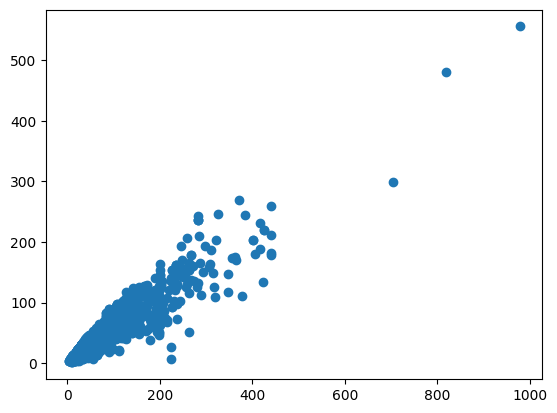

In [ ]:
plt.scatter(dfE["Enroll"], dfE["# Resp"])

Let's also be good neighbors and label our axes.

### Correlations

There are so many features it might be a little mind-boggling where to start. A simple, coarse way could be to look at **correlations**, although you have to be a little fancier for the categorical data.

In [ ]:
df.corr()

<ipython-input-50-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Crse,Enroll,# Resp,Resp Rate,HrsPerWk,Interest,Challenge,Learned,Course,Effect,Avail,Respect,Instr,SD Crse,SD Instr
Year,1.000000,0.000966,-0.022863,-0.039878,-0.104516,-0.035707,-0.008754,-0.099942,-0.015486,0.011988,0.071309,0.063362,-0.048362,0.032360,-0.007357,-0.048833
Crse,0.000966,1.000000,-0.235103,-0.205537,0.107245,0.193598,0.287034,0.202110,0.111643,0.104567,0.105583,0.096083,0.077592,0.044377,-0.141192,-0.100065
Enroll,-0.022863,-0.235103,1.000000,0.938891,-0.146257,-0.106377,-0.194875,-0.077932,-0.151854,-0.188258,-0.166648,-0.169007,-0.052639,-0.145696,0.194696,0.194357
# Resp,-0.039878,-0.205537,0.938891,1.000000,0.070217,-0.108441,-0.181057,-0.069145,-0.123906,-0.155658,-0.124032,-0.126661,-0.026485,-0.108098,0.169391,0.163612
Resp Rate,-0.104516,0.107245,-0.146257,0.070217,1.000000,-0.002209,0.116346,0.061388,0.143352,0.165971,0.204520,0.200069,0.123475,0.181917,-0.124408,-0.157001
HrsPerWk,-0.035707,0.193598,-0.106377,-0.108441,-0.002209,1.000000,0.178007,0.523302,0.270617,0.106774,0.072193,0.050029,0.005674,0.039022,-0.106698,-0.062763
Interest,-0.008754,0.287034,-0.194875,-0.181057,0.116346,0.178007,1.000000,0.265729,0.421924,0.467969,0.413789,0.243210,0.161490,0.283080,-0.356431,-0.282614
Challenge,-0.099942,0.202110,-0.077932,-0.069145,0.061388,0.523302,0.265729,1.000000,0.563408,0.335754,0.281681,0.244852,0.193478,0.262116,-0.249958,-0.220562
Learned,-0.015486,0.111643,-0.151854,-0.123906,0.143352,0.270617,0.421924,0.563408,1.000000,0.866171,0.764588,0.583255,0.442744,0.744826,-0.606315,-0.599264
Course,0.011988,0.104567,-0.188258,-0.155658,0.165971,0.106774,0.467969,0.335754,0.866171,1.000000,0.871575,0.666647,0.492766,0.860925,-0.695179,-0.694603


### Proportions

Let's check what proportion of undergraduate lower-division courses in the College of Engineering are taught be tenured/tenure-track (`Instr Grp = TTT`).

This can be calculated as the number of courses taught by `TTT` faculty, divided by the number of courses overall.

We can get the denominator by using the `len()` function in Python. This will just give us the total number of rows in the DataFrame `dfE`. Since each row is a different course, the number of rows equals the number of courses.

In [ ]:
# number of courses overall
den = len(dfE)

Then to get the number of courses taught by `TTT` faculty, we can use `df.loc` and add the restriction that `dfE["Instr Grp"]=="TTT"`.

In [ ]:
# how many courses are taught by TTT faculty?
num = len(dfE.loc[dfE["Instr Grp"]=="TTT"])

Let's use magic, I mean, division to get the proportion of courses taught by tenured/tenure-track faculty. We can use the `print()` function in Python to have it print out to the screen whatever is inside its parentheses.

In [ ]:
# magic of division
print(num/den)

0.3439153439153439


We can level-up our social CL if we want:

In [ ]:
# more magical:
print("Proportion of lower-division Engineering courses taught by TTT faculty: {:0.2f}".format(num/den))

Proportion of lower-division Engineering courses taught by TTT faculty: 0.34


<br>

# Individual Exploration

Take a few minutes to explore this data a bit on your own. Use the output from `df` or `df.head()` above, and the [guide from Tony's GitHub](https://github.com/tonyewong/testDriving/blob/master/CUFCQ/inst_summary_download_1019_FCQDescription.csv) to think about how some of the features in the data may be related to one another.

**Possibly useful:** You can click the little wand in the lower-left of the `df.head()` cell above to have a more interactive version. From there, you can `filter` to only specific parts of the data. What are some things you're curious about?

<br>

# Group Discussion

Get into small groups (about 4 each) and discuss what relationships you expect to see among the features in the data set. What are some questions you might ask? What other features might also influence those relationships? Feel free to steal insight from your concept maps from last week, if they're still up.

<br>

# Stashed code

In [1]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(dfE.Enroll, dfE.Instr, xlab="bla")
ax[1].scatter(dfA.Enroll, dfA.Instr);

NameError: ignored

In [ ]:
dfE[["Enroll","HrsPerWk","Interest","Instr"]].corr()

,Enroll,HrsPerWk,Interest,Instr
Enroll,1.000000,0.061569,-0.052838,-0.225567
HrsPerWk,0.061569,1.000000,0.369013,0.022906
Interest,-0.052838,0.369013,1.000000,0.250644
Instr,-0.225567,0.022906,0.250644,1.000000


In [ ]:
import statsmodels.api as sm

In [ ]:
# Collect the features in a 2D array
X = dfE[["Enroll","HrsPerWk","Interest"]]

# Add a constant to the array for the intecept
X = sm.add_constant(X)

# Collect the response data in an array
y = dfE["Instr"]

# Fit the ordinary least-squares (OLS) model
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Instr   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     70.79
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           3.91e-43
Time:                        18:08:19   Log-Likelihood:                -1896.2
No. Observations:                1701   AIC:                             3800.
Df Residuals:                    1697   BIC:                             3822.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0860      0.104     39.135      0.000       3.881       4.291
Enroll        -0.0021      0.000     -9.040      0.000      -0.003      -0.002
HrsPerWk      -0.0481      0.019     -2.469      0.014      -0.086      -0.010
Interest       0.2726      0.026     10.612      0.000       0.222       0.323
==============================================================================
Omnibus:                      346.770   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.818
Skew:                          -1.216   Prob(JB):                    9.66e-146
Kurtosis:                       4.873   Cond. No.                         642.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Standardizing the features so their original scales aren't unduly influencing our view of how important they are

In [ ]:
for feat in ["Enroll","HrsPerWk","Interest","Challenge"]:
  dfE[feat+"_stnd"] = (dfE[feat] - dfE[feat].mean())/dfE[feat].std()

In [ ]:
# Collect the features in a 2D array
X = dfE[["Enroll_stnd","HrsPerWk_stnd","Interest_stnd"]]

# Add a constant to the array for the intecept
X = sm.add_constant(X)

# Collect the response data in an array
y = dfE["Instr"]

# Fit the ordinary least-squares (OLS) model
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Instr   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     70.79
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           3.91e-43
Time:                        18:08:20   Log-Likelihood:                -1896.2
No. Observations:                1701   AIC:                             3800.
Df Residuals:                    1697   BIC:                             3822.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9145      0.018    274.423      0.000       4.879       4.950
Enroll_stnd      -0.1628      0.018     -9.040      0.000      -0.198      -0.127
HrsPerWk_stnd    -0.0478      0.019     -2.469      0.014      -0.086      -0.010
Interest_stnd     0.2052      0.019     10.612      0.000       0.167       0.243
==============================================================================
Omnibus:                      346.770   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.818
Skew:                          -1.216   Prob(JB):                    9.66e-146
Kurtosis:                       4.873   Cond. No.                         1.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prior interest and workload aren't actually similar in their influence at all!

And class size turns out to have a much more negative influence than workload. Not great, since instructors can generally change their course structure but don't have control over class size.

## Potential problems?

## Including dummy variables for categorical

```
df = pd.get_dummies(df, columns=['team'], drop_first=True)
```

Let's create dummy variables for the instructor groups:
* `TTT` = tenured/tenure-track (has research responsibilities, and a lot of them)
* `TA` =

In [ ]:
dfE["Instr Grp"].unique()

array(['OTH', 'TTT', 'TA', 'INST'], dtype=object)

In [ ]:
dfE = pd.get_dummies(dfE, columns=["Instr Grp"], drop_first=True)

In [ ]:
dfE.columns

Index(['level_0', 'index', 'Term', 'Year', 'Campus', 'College', 'Dept',
       'Sbjct', 'Crse', 'Sect', 'Crse Title', 'Instructor Name', 'Crse Type',
       'Crse Lvl', 'Onlin', 'Enroll', '# Resp', 'Resp Rate', 'HrsPerWk',
       'Interest', 'Challenge', 'Learned', 'Course', 'Effect', 'Avail',
       'Respect', 'Instr', 'SD Crse', 'SD Instr', 'Enroll_stnd',
       'HrsPerWk_stnd', 'Interest_stnd', 'Challenge_stnd', 'Instr Grp_OTH',
       'Instr Grp_TA', 'Instr Grp_TTT'],
      dtype='object')

In [ ]:
# Collect the features in a 2D array
X = dfE[["Enroll_stnd","HrsPerWk_stnd","Interest_stnd", "Instr Grp_OTH", "Instr Grp_TA", "Instr Grp_TTT"]]

# Add a constant to the array for the intecept
X = sm.add_constant(X)

# Collect the response data in an array
y = dfE["Instr"]

# Fit the ordinary least-squares (OLS) model
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Instr   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     39.71
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           6.13e-52
Time:                        18:34:59   Log-Likelihood:                -1867.2
No. Observations:                1701   AIC:                             3750.
Df Residuals:                    1693   BIC:                             3794.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -35.5663     14.685     -2.422      0.016     -64.369      -6.763
Year              0.0202      0.007      2.775      0.006       0.006       0.034
Enroll_stnd      -0.1553      0.018     -8.723      0.000      -0.190      -0.120
HrsPerWk_stnd    -0.0470      0.019     -2.457      0.014      -0.085      -0.009
Interest_stnd     0.2078      0.019     10.838      0.000       0.170       0.245
Instr Grp_OTH    -0.1441      0.067     -2.158      0.031      -0.275      -0.013
Instr Grp_TA     -0.2958      0.093     -3.168      0.002      -0.479      -0.113
Instr Grp_TTT    -0.3308      0.071     -4.668      0.000      -0.470      -0.192
==============================================================================
Omnibus:                      315.894   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.363
Skew:                          -1.150   Prob(JB):                    3.82e-124
Kurtosis:                       4.651   Cond. No.                     1.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Students' mood better linked to course evaluation scores than anything to do with actual teaching
* Braga et al 2014
* Zumbach and Funke 2019

How could we see this in the data?

In [ ]:
dfE2 = pd.get_dummies(dfE, columns=["Term"], drop_first=True)

In [ ]:

dfE2.columns

Index(['level_0', 'index', 'Year', 'Campus', 'College', 'Dept', 'Sbjct',
       'Crse', 'Sect', 'Crse Title', 'Instructor Name', 'Crse Type',
       'Crse Lvl', 'Onlin', 'Enroll', '# Resp', 'Resp Rate', 'HrsPerWk',
       'Interest', 'Challenge', 'Learned', 'Course', 'Effect', 'Avail',
       'Respect', 'Instr', 'SD Crse', 'SD Instr', 'Enroll_stnd',
       'HrsPerWk_stnd', 'Interest_stnd', 'Challenge_stnd', 'Instr Grp_OTH',
       'Instr Grp_TA', 'Instr Grp_TTT', 'Term_Spring', 'Term_Summer'],
      dtype='object')

In [ ]:
# Collect the features in a 2D array
X = dfE2[["Enroll_stnd","HrsPerWk_stnd","Interest_stnd", "Instr Grp_OTH", "Instr Grp_TA", "Instr Grp_TTT", "Term_Spring", "Term_Summer"]]

# Add a constant to the array for the intecept
X = sm.add_constant(X)

# Collect the response data in an array
y = dfE2["Instr"]

# Fit the ordinary least-squares (OLS) model
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Instr   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     36.67
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           6.06e-54
Time:                        18:38:07   Log-Likelihood:                -1860.5
No. Observations:                1701   AIC:                             3739.
Df Residuals:                    1692   BIC:                             3788.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1844      0.060     86.934      0.000       5.067       5.301
Enroll_stnd      -0.1420      0.018     -7.764      0.000      -0.178      -0.106
HrsPerWk_stnd    -0.0867      0.022     -3.956      0.000      -0.130      -0.044
Interest_stnd     0.2168      0.019     11.244      0.000       0.179       0.255
Instr Grp_OTH    -0.2041      0.062     -3.269      0.001      -0.327      -0.082
Instr Grp_TA     -0.3543      0.091     -3.883      0.000      -0.533      -0.175
Instr Grp_TTT    -0.3886      0.065     -5.995      0.000      -0.516      -0.261
Term_Spring      -0.0913      0.038     -2.407      0.016      -0.166      -0.017
Term_Summer       0.2501      0.078      3.206      0.001       0.097       0.403
==============================================================================
Omnibus:                      332.671   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.493
Skew:                          -1.180   Prob(JB):                    5.52e-137
Kurtosis:                       4.813   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""